## Classification of Yelp Review text using CountVectroizer, TF-IDF,RandomForest, Navie Bayes MultinomialNB

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

### Load Data and Check sample contents 

In [2]:
data=pd.read_csv('yelp.csv')
data.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [244]:
data['text'].values[5]

"Quiessence is, simply put, beautiful.  Full windows and earthy wooden walls give a feeling of warmth inside this restaurant perched in the middle of a farm.  The restaurant seemed fairly full even on a Tuesday evening; we had secured reservations just a couple days before.\n\nMy friend and I had sampled sandwiches at the Farm Kitchen earlier that week, and were impressed enough to want to eat at the restaurant.  The crisp, fresh veggies didn't disappoint: we ordered the salad with orange and grapefruit slices and the crudites to start.  Both were very good; I didn't even know how much I liked raw radishes and turnips until I tried them with their pesto and aioli sauces.\n\nFor entrees, I ordered the lamb and my friend ordered the pork shoulder.  Service started out very good, but trailed off quickly.  Waiting for our food took a very long time (a couple seated after us received and finished their entrees before we received our's), and no one bothered to explain the situation until the

### Use some basic functions to view the type of data,min,max values etc for Numerical cloumns  

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [246]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### Check the distribution of number of reviewes and the corresponding ratings 

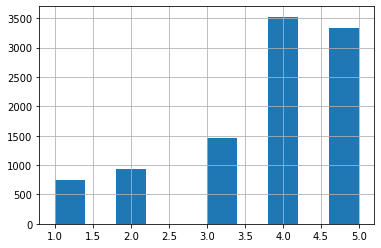

In [247]:
data['stars'].hist()

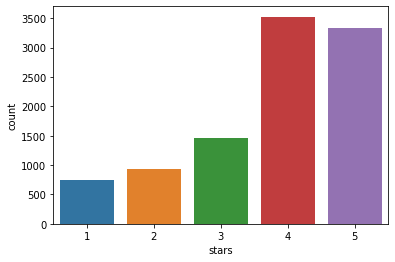

In [381]:
sns.countplot(data=data,x='stars')

#### Observation:The number of records for 4 and 5 rating are large compared to 1 and 2 ratings from above Histogram

### Create a new column length to store the length of each review text.

In [3]:
#create a new column length to store the len of the review text
data['length']=data['text'].apply(len)

In [4]:
#explore funny column 
data['funny'].unique()

array([ 0,  1,  4,  2,  3,  8,  9,  6,  5, 39,  7, 12, 16, 20, 27, 11, 13,
       17, 10, 30, 22, 14, 19, 18, 23, 21, 15, 24, 57])

### Let see how the lenght of each text is distributed 

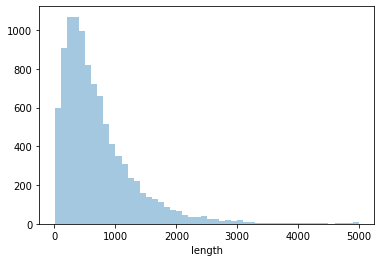

In [250]:
sns.distplot(data['length'],kde=False)

#### We observe majority of the reviews hav text length around 1000 and there are some outliers with large lenght of text

### Lets plot a scatterplot to see the relation of Lenght to the ratings column

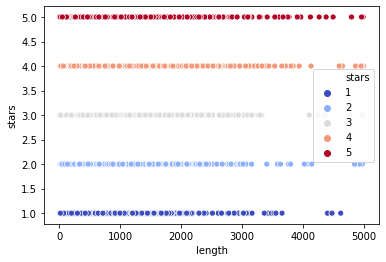

In [367]:
sns.scatterplot(data=data,x='length',y=data['stars'],hue=data['stars'],palette='coolwarm',legend='full')

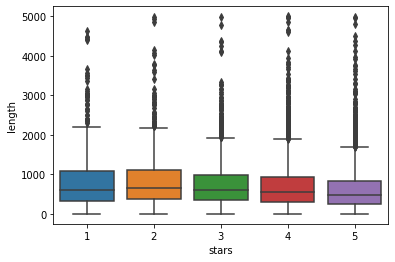

In [379]:
sns.boxplot(data=data,x='stars',y='length')

#### Observation: we see the length of each rating is almost equally distributed and each rating has out liers 

### Check the corelation of data and plot a heat map to visualize

In [384]:
data.corr()

,stars,cool,useful,funny,length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
length,-0.114674,0.241451,0.293975,0.251760,1.000000


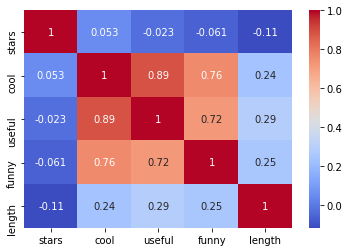

In [383]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

#### Observation: We see usevul and cool are highly co-releated as may of the reviews that are useful may have cool votings

In [5]:
#Lets extract stars with rating 1 and rating 5
BOW=data[(data['stars']==5 )| (data['stars']==1)]


In [6]:
print("Number of Revies with rating 1 or 5 are:",(len(BOW['stars'])))

Number of Revies with rating 1 or 5 are: 4086


In [333]:
#Lets check the content of a review
data[data['stars']==1]['text'].values[0]

"U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!"

### Seperate Dependent and Independent Features for each classification model 

In [290]:
X_NB=BOW['text']
y_NB=BOW['stars']
X_RF=BOW['text']
y_RF=BOW['stars']
X_CV=BOW['text']
y_CV=BOW['stars']
X_KN=BOW['text']
y_KN=BOW['stars']

### Samples to compare BOW to CountVectrozer  - Toy example

In [257]:

v1=CountVectorizer()
X=v1.fit_transform(["Hi There! did u run!I told. Running is like eating healthy diet. DO you Agreee what I said"])
print("CountVectorizer Internal analyzer: \n",v1.get_feature_names())
print(X.toarray())
print(X.get_shape())

v2=CountVectorizer(analyzer=clean_review_text)
X=v2.fit_transform(["Hi There! How? are! I told. Running is as good as eating healthy diet. DO you Agreee what I said"])
print("Custom Analyzer: \n",v2.get_feature_names())
print(X.toarray())
print(X.get_shape())

#Example to show how stemmer works:
#Stemmers remove morphological affixes from words, leaving only the word stem.
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
print("Sample Stemmer for running is : ",stemmer.stem("running"))

CountVectorizer Internal analyzer: 
 ['agreee', 'did', 'diet', 'do', 'eating', 'healthy', 'hi', 'is', 'like', 'run', 'running', 'said', 'there', 'told', 'what', 'you']
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(1, 16)
Custom Analyzer: 
 ['agree', 'diet', 'eat', 'good', 'healthi', 'hi', 'run', 'said', 'told']
[[1 1 1 1 1 1 1 1 1]]
(1, 9)
Sample Stemmer for running is :  run


### Build Custom Analyzer

In [46]:
import string
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
def clean_review_text(review):
    """
    1. Remove Punctuation
    2. Remove Stop Words
    3. Apply SnowBall Stemmer to remove morphological affixes from words, leaving only the word stem.
    """
    stemmer = SnowballStemmer("english")
    no_punc=[c for c in review if c not in string.punctuation]
    no_punc=''.join(no_punc)
    return [stemmer.stem(word) for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    

###  Build a pipeline with countvectroizer,TFIDF Transformer and Navive_Bayes MultinomialNB

In [259]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB,y_NB, test_size=0.3, random_state=101)

pipeline_NB=Pipeline([('countvec',CountVectorizer(analyzer=clean_review_text)),
                    ('tfidf',TfidfTransformer()),
                     ('algorithm',MultinomialNB())])

pipeline_NB.fit(X_train_NB,y_train_NB)

predictions_NB=pipeline_NB.predict(X_test_NB)

#Analyze Results
print(confusion_matrix(y_test_NB,predictions_NB))
print(classification_report(y_test_NB,predictions_NB))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Build a pipeline with countvectroizer,TFIDF Transformer and RandomForest Classifier to compare Results

In [260]:
from sklearn.ensemble import RandomForestClassifier
pipeline_RF=Pipeline([('countvec',CountVectorizer(analyzer=clean_review_text)),
                    ('tfidf',TfidfTransformer()),
                     ('algorithm',RandomForestClassifier())])

from sklearn.model_selection import train_test_split
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF,y_RF, test_size=0.3, random_state=101)

pipeline_RF.fit(X_train_RF,y_train_RF)

predictions_RF=pipeline_RF.predict(X_test_RF)

#Analyze Results
print(confusion_matrix(y_test_RF,predictions_RF))
print(classification_report(y_test_RF,predictions_RF))


[[ 89 139]
 [  2 996]]
              precision    recall  f1-score   support

           1       0.98      0.39      0.56       228
           5       0.88      1.00      0.93       998

    accuracy                           0.88      1226
   macro avg       0.93      0.69      0.75      1226
weighted avg       0.90      0.88      0.86      1226



### Analysis
#### we see the results form Random Forest Classifier are better compared to NaiveBayes classifier in this case

### We observe that the precision is low . Lets try to remove the TF-IDF and try to predict the results

In [261]:
pipeline_CV=Pipeline([('countvec',CountVectorizer(analyzer=clean_review_text)),
                     ('algorithm',MultinomialNB())])

X_train_CV, X_test_CV, y_train_CV, y_test_CV = train_test_split(X_CV,y_CV, test_size=0.3, random_state=101)

pipeline_CV.fit(X_train_CV,y_train_CV)

predictions_CV=pipeline_CV.predict(X_test_CV)

#Analyze Results
print(confusion_matrix(y_test_CV,predictions_CV))
print(classification_report(y_test_CV,predictions_CV))

[[  0 189  39]
 [  0   0   0]
 [  0 456 542]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           4       0.00      0.00      0.00         0
           5       0.93      0.54      0.69       998

    accuracy                           0.44      1226
   macro avg       0.31      0.18      0.23      1226
weighted avg       0.76      0.44      0.56      1226



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
import numpy as np
tot_score=np.zeros(13)
print(len(tot_score))

13


### Implement KNN 

In [77]:
X_KN=BOW['text']
y_KN=BOW['stars']

In [68]:
#Take input text and clean punctuations , stop words etc with custom analyzer
cvo=CountVectorizer(analyzer=clean_review_text)
#Replace X with the cleaned text
X_KN=cvo.fit_transform(X_KN)

In [69]:
#len(y_train_KN)
X_train_KN.shape

(3268, 16020)

In [70]:
X_train_KN, X_test_KN, y_train_KN, y_test_KN=train_test_split(X_KN,y_KN,test_size=0.2, random_state=101)

In [71]:

#lets keep the neighbours odd number form 1 to 25 
n_neigh=[i for i in range(26) if i%2!=0]
cv_scores=[]
#For each k value 
#1.Split the same training data with 10 fold and try to find the best K vlue .It returs list of scores.
#2.compute the mean score for each this neighbor value and store it
for i in n_neigh:
    model=KNeighborsClassifier(n_neighbors=i,weights='distance')
    scores = cross_val_score(model, X_train_KN, y_train_KN, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#Compute the Error for each k value and print the kvalue that has minimum error
MSE=[1-scr for scr in cv_scores] 
print("Errors  are:",MSE)
print("Least Error is :", min(MSE))
print("k value to use is: ",n_neigh[MSE.index(min(MSE))])

Errors  are: [0.1985957111498846, 0.1872788503029963, 0.17043582671994884, 0.17624810041087413, 0.17502767302677247, 0.1768625354120935, 0.1774750942759047, 0.17839346353726937, 0.17900602240108066, 0.17961858126489183, 0.17992439166244534, 0.18023020205999885, 0.18084276092381002]
Least Error is : 0.17043582671994884
k value to use is:  5


In [72]:
model=KNeighborsClassifier(n_neighbors=5,weights='distance')
model.fit(X_train_KN, y_train_KN)
predictions_KN=model.predict(X_test_KN)

#Analyze Results
print(confusion_matrix(y_test_KN,predictions_KN))
print(classification_report(y_test_KN,predictions_KN))
print(accuracy_score(y_test_KN,predictions_KN))

[[ 14 136]
 [  7 661]]
              precision    recall  f1-score   support

           1       0.67      0.09      0.16       150
           5       0.83      0.99      0.90       668

    accuracy                           0.83       818
   macro avg       0.75      0.54      0.53       818
weighted avg       0.80      0.83      0.77       818

0.8251833740831296


In [78]:
#Lets check the result with TF-IDF and KNN
pipeline_KN=Pipeline([('countvec',CountVectorizer(analyzer=clean_review_text)),
                    ('tfidf',TfidfTransformer()),
                     ('algorithm',KNeighborsClassifier(n_neighbors=5))])


X_train_KN, X_test_KN, y_train_KN, y_test_KN=train_test_split(X_KN,y_KN,test_size=0.2, random_state=101)

pipeline_KN.fit(X_train_KN,y_train_KN)

predictions_KN=pipeline_KN.predict(X_test_KN)

#Analyze Results
print(confusion_matrix(y_test_KN,predictions_KN))
print(classification_report(y_test_KN,predictions_KN))
print(accuracy_score(y_test_KN,predictions_KN))

[[ 50 100]
 [ 16 652]]
              precision    recall  f1-score   support

           1       0.76      0.33      0.46       150
           5       0.87      0.98      0.92       668

    accuracy                           0.86       818
   macro avg       0.81      0.65      0.69       818
weighted avg       0.85      0.86      0.83       818

0.8581907090464548


### Observation: By using TF-IDF we see the accuracy slightly increased form 82.5 to 85.8 

##  Final Analysis
### When we compare Results form CountVectroizer , NaiveBayes and RandomForest Classifer , we observe RF performed better on this data